<h1>Grid Search Random Forest</h1>

In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h3>A - Prepare for Grid Search</h3>

In [2]:
encoded_challenge_set = pd.read_csv('../data/encoded_challenge_set.csv')

# Pick up features from dataset
features = encoded_challenge_set[['adep', 'country_code_adep', 'ades', 'country_code_ades', 'aircraft_type', 'wtc', 'airline', 'flight_duration', 
                                  'taxiout_time', 'flown_distance', 'month-day', 'month', 'day_in_month', 'min_tow', 'max_tow' ]]

# Pick up target from dataset
target = encoded_challenge_set['tow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)

In [3]:
# Function to score model using Root Mean Square Error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
# Create a scorer
rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Make cross validation strategy
cv_strategy = KFold(n_splits=3, shuffle=True, random_state=123)

# Function to print the best parameters and best RMSE score after tunning
def print_model_score(grid_search):
    print("Best Parameters:", grid_search.best_params_)
    print("\nBest Score (Root Mean Squared Error):", grid_search.best_score_)

<h3>B - Perform Grid Search Random Forest Regressor</h3>

In [4]:
n_estimators = list(range(1,101,5)) # Testing 1 to 100 n-estimators with 5 intervall in between to avoid long run time.

param_grid = {
    'n_estimators': n_estimators,
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=cv_strategy,
    n_jobs=-1,  # Use all available cores
    verbose=2
)  # Print detailed progress

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print Grid Search Results
print_model_score(grid_search)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 96}

Best Score (Root Mean Squared Error): -3690.6420161406113


<h3>Draw elbow graph</h3>

[-5192.10839427 -3977.17057912 -3829.95620965 -3786.04104796
 -3755.86551443 -3748.60802884 -3727.06916372 -3721.36127872
 -3714.27526767 -3713.85003636 -3708.36339337 -3703.46694298
 -3701.68737231 -3702.73122231 -3696.78254583 -3695.57871087
 -3691.96741874 -3692.61932706 -3693.55826082 -3690.64201614]


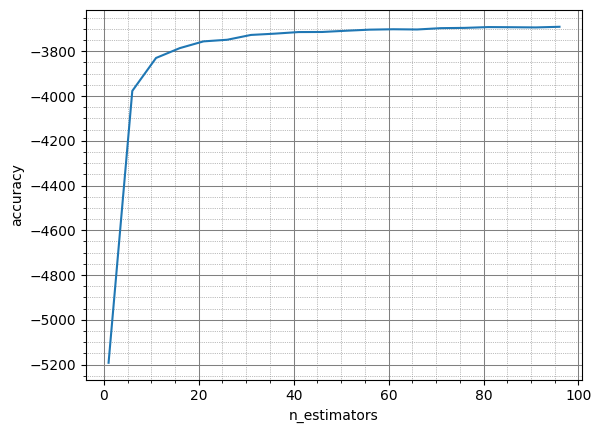

In [5]:
scores = grid_search.cv_results_['mean_test_score']
print(scores)


plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
#plt.xlim(0, 100)
#plt.ylim(0.9, 1)
plt.minorticks_on()
plt.grid(True)
# Add major grid
plt.grid(which='major', color='gray', linestyle='-', linewidth=0.75)
# Add minor grid
plt.grid(which='minor', color='gray', linestyle=':', linewidth=0.5)
plt.show()

<h3>C - Evaluate Best Estimator</h3>

In [6]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
test_rmse = rmse(y_test, y_pred)
print("Test RMSE: ", test_rmse)

Test RMSE:  3604.045392167915
